# Fake news classifier

In [151]:
# Courtesy Krish Naik, data from Kaggle

In [153]:
# Read data into dataframe
import pandas as pd
df = pd.read_csv('/home/sandeep/Development/Datasets/Media/fake-news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [154]:
df.iloc[0,1]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [157]:
# Drop the id column, not useful
df.drop('id', axis=1, inplace=True)
df

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [159]:
# Check for null values in the rows
df.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [168]:
# About 10% rows have null values, let's remove them for simplicity
df.dropna(inplace=True)
df.reset_index(inplace=True)
df

,index,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
18280,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [169]:
# Separate independent and dependent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [170]:
X.head(1)

,index,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...


In [171]:
len(X.author.unique())

3838

In [172]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [173]:
# Data cleaning and preprocessing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(X)):
    review = re.sub('[^a-zA-Z]', ' ', X['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    if (i+1)%1000==0:
        print(f"{i+1} records cleaned, {(i+1)*100/len(X)}% job completed")

1000 records cleaned, 5.468963631391851% job completed
2000 records cleaned, 10.937927262783703% job completed
3000 records cleaned, 16.406890894175554% job completed
4000 records cleaned, 21.875854525567405% job completed
5000 records cleaned, 27.344818156959256% job completed
6000 records cleaned, 32.81378178835111% job completed
7000 records cleaned, 38.28274541974296% job completed
8000 records cleaned, 43.75170905113481% job completed
9000 records cleaned, 49.22067268252666% job completed
10000 records cleaned, 54.68963631391851% job completed
11000 records cleaned, 60.158599945310364% job completed
12000 records cleaned, 65.62756357670222% job completed
13000 records cleaned, 71.09652720809406% job completed
14000 records cleaned, 76.56549083948592% job completed
15000 records cleaned, 82.03445447087776% job completed
16000 records cleaned, 87.50341810226962% job completed
17000 records cleaned, 92.97238173366146% job completed
18000 records cleaned, 98.44134536505332% job comple

In [174]:
# Check a sample
corpus[3]

'civilian kill singl us airstrik identifi'

In [175]:
# Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [176]:
X.shape

(18285, 5000)

In [177]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [181]:
type(X_train)

numpy.ndarray

In [179]:
# Check the top 20 feature names that ngram has created
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [180]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [183]:
# Convert the training data from numpy array into a dataframe
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [184]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [191]:
import matplotlib.pyplot as plt
%matplotlib inline

In [194]:
## Passive Agressive Classifier

from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

# Train the model and make predictions
linear_clf.fit(X_train, y_train)
preds = linear_clf.predict(X_test)

# Check the performance
accuracy_score(preds, y_test)

print(classification_report(preds, y_test))

ConfusionMatrixDisplay.from_predictions(preds, y_test, labels=[0,1], display_labels=['FAKE', 'REAL'])

## Passive Agressive Classifier gave an accuracy of 92%, which is very goodfrom sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

## Passive Agressive Classifier

In [199]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

In [200]:
# Train the model and make predictions
linear_clf.fit(X_train, y_train)
preds = linear_clf.predict(X_test)

In [201]:
# Check the performance
accuracy_score(preds, y_test)

0.9206296603148302

In [204]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3340
           1       0.92      0.90      0.91      2695

    accuracy                           0.92      6035
   macro avg       0.92      0.92      0.92      6035
weighted avg       0.92      0.92      0.92      6035



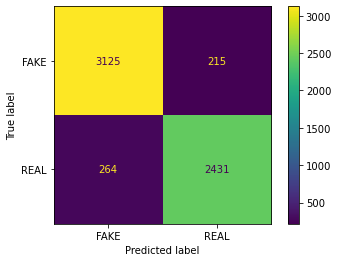

In [203]:
ConfusionMatrixDisplay.from_predictions(preds, y_test, labels=[0,1], display_labels=['FAKE', 'REAL'])

## Passive Agressive Classifier gave an accuracy of 92%, which is very good